# Calcul/Analyse préconception système vanne

Le thème d'etude est la vanne de prise d'air d'un avion de ligne.
Nous souhaitons motoriser ce système à l'aide d'un actionneur linéaire à l'aide d'un vérin électrique.Voir si dessous:


Image

Nous devons donc:
- Choisir une architecture pour le dispositif de commande 
- Choisir un actionneur 
- Faire la maquette numérique de notre conception

Mais avant toute chose nous devons faire une analyse de préconception en:
- Calculant le degré d'hyperstatisme de ce mécanisme
- Ecrivant les deux équations scalaires issues de la fermeture géometrique du système et en déterminer la loi entrée/sortie de ce mécanisme 
- Estimant l'effort aérodynamique de la pièce 2, en position fermée

## Shéma cinématique:


Image




## Hyperstatisme:

### degrée mobilité:

In [13]:
import math
from sympy import Symbol, Eq, solve

""" Mécanisme Plan """

Np = 4                          # nb de pièce avec bati
NL1 = 4                        # nb de liaisons à 1 degré de liberté
NL2 = 0                        # nb de liaisons à 1 degré de liberté

mu = 3*(Np-1)-2*NL1-2*NL2

print(f"Le degrée de mobilité du mécanisme plan est de {mu}")

Le degrée de mobilité du mécanisme plan est de 1


### degrée d'hyperstatisme:

In [7]:
Es = 6*(Np-1)
S = 4*5
me = Es-S
h = mu-me

print(f"Le degrée d'hyperstatisme du mécanisme plan est de {h}")

Le degrée d'hyperstatisme du mécanisme plan est de 3


## Loi entrée/sortie 
Voici le shéma qui represente les angle et blablabla:


Image


Nous cherchons donc à déterminé theta_4 par rapport à theta_2

### Equation scalaire de fermeture:

vect_OA + vect_AB + vect_BC + vect_CO = vect_nul

ce qui implique:

vect_OC = vect_OA + vect_AB + vect_BC

### Projection en x et y:

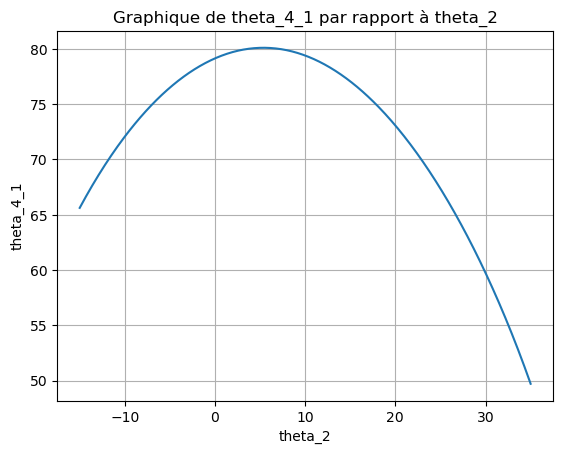

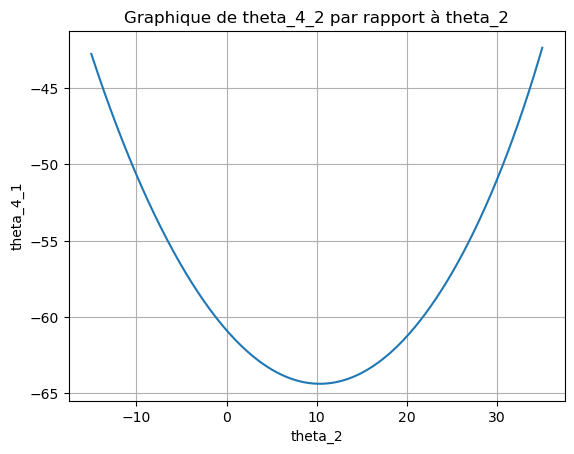

In [119]:
import numpy as np
import matplotlib.pyplot as plt


theta_2 = np.radians(np.linspace(-15,35,500))

l2 = 62.5
l3 = 378
l4 = 20

xc = 442
yc = 61

X = xc-l2*np.cos(theta_2)
Y = yc-l2*np.sin(theta_2)

A = X**2+2*X*l4+Y**2+l4**2-l3**2
B = -4*Y*l4
C = X**2-2*X*l4+Y**2+l4**2-l3**2

delta = B**2-4*A*C

t1 = (-B+np.sqrt(delta))/(2*A) 
t2 = (-B-np.sqrt(delta))/(2*A) 

# Calculer les valeurs correspondantes de la fonction sinus
theta_4_1 = np.degrees(2*np.arctan(t1))
theta_4_2 = np.degrees(2*np.arctan(t2))

# Tracer le graphique
plt.plot(np.degrees(theta_2), theta_4_1)
plt.title('Graphique de theta_4_1 par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('theta_4_1')
plt.grid(True)
plt.show()

plt.plot(np.degrees(theta_2), theta_4_2)
plt.title('Graphique de theta_4_2 par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('theta_4_1')
plt.grid(True)
plt.show()

### Détermination de FE et R4

In [151]:
def theta_4(theta_2):
    theta_2 = np.radians(theta_2)
    l2 = 62.5
    l3 = 378
    l4 = 20
    xc = 442
    yc = 61
    
    X = xc-l2*np.cos(theta_2)
    Y = yc-l2*np.sin(theta_2)
    
    A = X**2+2*X*l4+Y**2+l4**2-l3**2
    B = -4*Y*l4
    C = X**2-2*X*l4+Y**2+l4**2-l3**2
    
    delta = B**2-4*A*C
    
    t1 = (-B+np.sqrt(delta))/(2*A) 
    
    return np.degrees(2*np.arctan(t1))



theta4 = theta_4(8)
print(theta4)

79.86953277634494


In [152]:
theta_2 = 8
theta4 = theta_4(theta_2)

In [168]:
theta_2 = np.radians(4)
theta_4 = np.radians(75)


e = 60
c2 = 31.67
c3 = 202.82
P2 = 347
P3 = 6330

X = xc-l2*np.cos(theta_2)
        
theta_3 = ((X-l4*np.cos(theta_4))/l3)
alpha_3 = np.radians(4.4)
beta = np.radians(90)
        
m11 = e*(np.cos(theta_3-alpha_3)*np.cos(beta)) + np.sin(theta_3-alpha_3)*np.sin(beta)
m12 = l3*(np.cos(theta_3)*np.sin(theta_4)-np.sin(theta_3)*np.cos(theta_4))
        
m21 = (l2*np.cos(theta_2)+e*np.cos(theta_3-alpha_3))*np.cos(beta)+ (l2*np.sin(theta_2)+e*np.sin(theta_3-alpha_3))*np.sin(beta)
m22 = (l2*np.cos(theta_2)+l3*np.cos(theta_3))*np.sin(theta_4)-(l2*np.sin(theta_2)+l3*np.sin(theta_3))*np.cos(theta_4)
        
v1 = -c3*P3
v2 = -c2*P2-P3*np.cos(theta_3-alpha_3)*(l2*np.cos(theta_2)+c3*np.cos(theta_3-alpha_3))-P3*np.sin(theta_3-alpha_3)*(l2*np.sin(theta_2)+c3*np.sin(theta_3-alpha_3))


# Définir la matrice et le vecteur
A = np.array([[m11, m12], [m21, m22]])
B = np.array([v1, v2])

# Résoudre le système d'équations linéaires
solution = np.linalg.solve(A, B)

# Afficher la solution
Fe, R4 = solution
print("Solution : Fe =", Fe, ", y =", R4)    

Solution : Fe = 7249.784219195819 , y = -10900.732163671108
